<a href="https://colab.research.google.com/github/DIPANJAN001/Dipanjanpatra/blob/master/TermPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine learning on Solar power system

###PROBLEM STATEMENT: -
Solar Power forecasting for a Solar Power System is a very active research field, as 
reliable information about the future power generation allow for a safe operation of 
the power grid and helps to minimize the operational costs. Deep Learning 
algorithms have shown to be very powerful in forecasting tasks, such as economic 
time series or speech recognition. Up to now, Deep Learning algorithms have only 
been applied sparsely for forecasting renewable energy power plants. By using 
different Deep Learning  Algorithms, such as RNN,LSTM with 
different Feature extraction method like PCA,1D CNN , Auto encoders , 
My motive is to show the forecast strength of these algorithms compared to a 
standard MLP and traditional machine learning model in forecasting the energy 
output of 21 solar power plants 

### POSSIBLE SOLUTION:
Applying different deep learning techniques like MLP,Simple RNN,LSTM,GRU on solar power system to predict a hour/day ahead solar power generation based on Certain weather condition of the location of solar power system.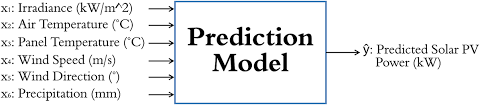

### Data description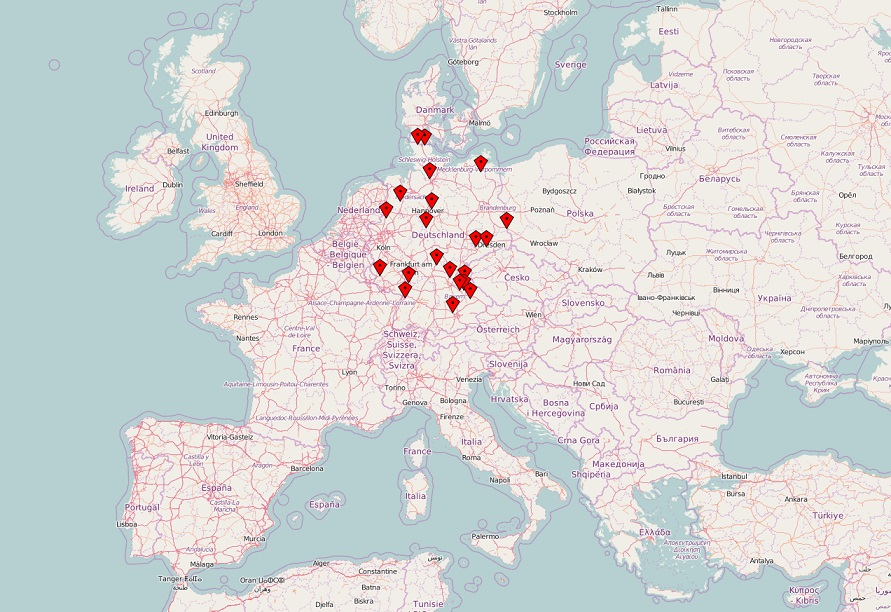

The GermanSolarFarm data set contains 21 photovoltaic facilities in Germany. Their installed nominal power ranges between 100kW and 8500kW. The PV facilities range from PV panels installed on rooftops to fully fledged solar farms. They are distributed throughout Germany as shown in the attached image. For each facility historical NWP data and the produced power in a three-hour resolution for 990 days are available. All-time series in the data set, except the measured power output, are normalized between 0 and 1 using the min max normalization. The target variable, the measured power output, is normalized using the nominal output capacity of the corresponding PV facility. Therefore, allow the comparison of the forecasting performance without taking the size of the PV facilities into account.

In [ ]:
import numpy as np

### TECHNIQUES AND ALGORITHMS ALREADY USED:

1.MLP
2.PCA
3.Simple RNN
4.1D CNN
5.LSTM

TECHNIQUES AND ALGORITHMS WILL BE USED IN FUTURE

1.AutoEncoder 
2.GRU
3.Other Feature Extraction Methods
4.Ensembling of Deep learning Model

## Importing training data 

*   সূচির আইটেম
*   সূচির আইটেম



In [ ]:
import pandas as pd

In [ ]:
weather_data=pd.read_excel("/content/pv_02.xlsx") 


## Data format

In [ ]:
weather_data.head()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
0,1,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.554229,0.195738,0.667024,0.971278,0.494272,0.563420,0.186512,0.694226,0.960735,0.000000
1,2,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.726648,0.023317,0.994589,0.573364,0.456086,0.732230,0.017730,0.996887,0.555710,0.000000
2,3,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.702088,0.047877,0.977444,0.648484,0.545543,0.707816,0.042140,0.982548,0.630947,0.000000
3,4,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.691446,0.058519,0.966460,0.680042,0.663653,0.693619,0.056335,0.968971,0.673395,0.014560
4,5,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,...,0.698192,0.051774,0.973667,0.660124,0.634276,0.700475,0.049480,0.976001,0.653047,0.152064


## Basic information About data

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6278 entries, 0 to 6277
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   time_idx                          6278 non-null   int64  
 1   hour_of_day                       6278 non-null   float64
 2   hour_of_day_cos                   6278 non-null   float64
 3   hour_of_day_sin                   6278 non-null   float64
 4   month_of_year                     6278 non-null   float64
 5   month_of_year_cos                 6278 non-null   float64
 6   month_of_year_sin                 6278 non-null   float64
 7   season_of_year                    6278 non-null   float64
 8   season_of_year_cos                6278 non-null   float64
 9   season_of_year_sin                6278 non-null   float64
 10  sunposition_thetaZ                6278 non-null   float64
 11  sunposition_solarAzimuth          6278 non-null   float64
 12  sunpos

In [ ]:
weather_data.describe()

,time_idx,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,...,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin,power_normed
count,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,...,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000,6278.000000
mean,3139.500000,0.499954,0.533018,0.606823,0.534406,0.431692,0.596333,0.537698,0.405616,0.560019,...,0.491233,0.397048,0.550846,0.596646,0.285866,0.503211,0.401261,0.574108,0.581461,0.098043
std,1812.446827,0.328137,0.365954,0.333380,0.324555,0.363050,0.334930,0.380736,0.389250,0.387716,...,0.252647,0.284922,0.344862,0.345228,0.147257,0.257754,0.295700,0.346130,0.343663,0.167662
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1570.250000,0.142857,0.095371,0.270427,0.272727,0.068148,0.258819,0.333333,0.000000,0.000000,...,0.266662,0.148443,0.208472,0.256385,0.179585,0.266771,0.137763,0.232231,0.245312,0.000000
50%,3139.500000,0.428571,0.661157,0.632563,0.545455,0.377014,0.707107,0.666667,0.171573,0.707107,...,0.548800,0.309852,0.619843,0.702792,0.272237,0.567392,0.310460,0.665994,0.676015,0.004211
75%,4708.750000,0.857143,0.957824,0.889960,0.818182,0.762999,0.866025,1.000000,0.585786,0.707107,...,0.665339,0.628433,0.877042,0.918121,0.373177,0.679796,0.644259,0.897807,0.902086,0.127687
max,6278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712430


## Weather input

In [ ]:
weather_input1=weather_data.drop('power_normed',axis=1)
weather_input=weather_input1.drop('time_idx',axis=1)
weather_input.head()


,hour_of_day,hour_of_day_cos,hour_of_day_sin,month_of_year,month_of_year_cos,month_of_year_sin,season_of_year,season_of_year_cos,season_of_year_sin,sunposition_thetaZ,...,LowerWindSpeed,LowerWindDirection,LowerWindDirectionMath,LowerWindDirectionCos,LowerWindDirectionSin,UpperWindSpeed,UpperWindDirection,UpperWindDirectionMath,UpperWindDirectionCos,UpperWindDirectionSin
0,0.000000,1.000000,0.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,1.000000,...,0.458204,0.554229,0.195738,0.667024,0.971278,0.494272,0.563420,0.186512,0.694226,0.960735
1,0.142857,0.957824,0.399332,0.909091,0.017332,0.258819,1.0,0.0,0.0,1.000000,...,0.432281,0.726648,0.023317,0.994589,0.573364,0.456086,0.732230,0.017730,0.996887,0.555710
2,0.285714,0.838278,0.732544,0.909091,0.017332,0.258819,1.0,0.0,0.0,1.000000,...,0.513296,0.702088,0.047877,0.977444,0.648484,0.545543,0.707816,0.042140,0.982548,0.630947
3,0.428571,0.661157,0.944463,0.909091,0.017332,0.258819,1.0,0.0,0.0,0.705699,...,0.676684,0.691446,0.058519,0.966460,0.680042,0.663653,0.693619,0.056335,0.968971,0.673395
4,0.571429,0.455788,1.000000,0.909091,0.017332,0.258819,1.0,0.0,0.0,0.611994,...,0.656101,0.698192,0.051774,0.973667,0.660124,0.634276,0.700475,0.049480,0.976001,0.653047


## Generated Solar power

In [ ]:
solpow=weather_data['power_normed']
solpow

0       0.000000
1       0.000000
2       0.000000
3       0.014560
4       0.152064
          ...   
6273    0.110155
6274    0.254311
6275    0.003055
6276    0.000000
6277    0.000000
Name: power_normed, Length: 6278, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_input,solpow, test_size=0.1, random_state=42,shuffle=False)

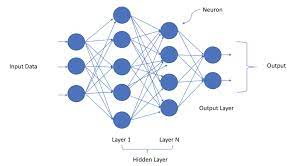## 1.Building first MLP prediction Model!

In [ ]:
X_train.shape

(5650, 49)

In [ ]:
from tensorflow import keras 

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 4.0 kB/s 
     |████████████████████████████████| 15.7 MB 55.7 MB/s 
     |████████████████████████████████| 5.8 MB 52.7 MB/s 
     |████████████████████████████████| 1.6 MB 46.3 MB/s 
     |████████████████████████████████| 438 kB 46.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.0 kB/s 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
MLP_model = Sequential()
MLP_model.add(Dense(8, kernel_initializer='normal',input_dim =X_train.shape[1], activation='relu'))


MLP_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
MLP_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
MLP_model.add(Dense(16, kernel_initializer='normal',activation='relu'))

MLP_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


MLP_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
MLP_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 400       
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,857
Trainable params: 3,857
Non-trainable params: 0
_________________________________________________________________


## Training the MLP model with Training data

In [ ]:
history=MLP_model.fit(X_train,y_train, epochs=80, batch_size=64, validation_split = 0.2)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['mean_absolute_error'])

## Importing test data

In [ ]:
import pandas as pd
weather_data_test=pd.read_excel("/content/pv_21.xlsx")

In [ ]:
weather_inputt=weather_data_test.drop('power_normed',axis=1)
weather_input_ts=weather_inputt.drop('time_idx',axis=1)
solpow=weather_data_test['power_normed']

## Predicting solar power generation on test data

In [ ]:
Ypred=MLP_model.predict(weather_input_ts)

## Comparing predicted solar power generation with actual generated solar power

In [ ]:
weather_data_test['Predicted_power_normed']=Ypred

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['Predicted_power_normed'],name='Predicted generated solar power by MLP with RMSE'),row=1,col=1
)


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['Predicted_power_normed'],name='Predicted generated solar power'),row=1,col=1
)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter((Ypred/1.3),solpow)
plt.xlabel("Predicted Solar Power geneartion")
plt.ylabel("Actual Solar Power geneartion")
plt.show()

### In this MLP model we are taking all the the 48 weather input features without taking into consideration that all the features may not be usefull to predict the solarpower 

## Now we can apply Principle component analysis to reduce the input dimension to a specific number that still contains most of the information in the large set.

PCA (Principle Component Analysis):
Principal Component Analysis (PCA) is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible. METHOD:

Calculate the covariance matrix
Calculate the eigenvectors and eigenvalues of the covariance matrix Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data. By this process of taking the eigenvectors of the covariance matrix, we have been able to extract lines that characterize the data.
Form a feature vector, which is just a fancy name for a matrix of vectors. This is constructed by taking the eigenvectors that you want to keep from the list of Eigen vectors and forming a matrix with these eigenvectors in the columns.

`𝐹𝑒𝑎𝑡𝑢𝑟𝑒𝑉𝑒𝑐𝑡𝑜𝑟 = (𝑒𝑖𝑔1 𝑒𝑖𝑔2 𝑒𝑖𝑔3 … … . . 𝑒𝑖𝑔𝑁)` 4) Deriving the new data set
`𝐹𝑖𝑛𝑎𝑙𝐷𝑎𝑡𝑎 = 𝑅𝑜𝑤𝐹𝑒𝑎𝑡𝑢𝑟𝑒𝑉𝑒𝑐𝑡𝑜𝑟 𝑋 𝑅𝑜𝑤𝐷𝑎𝑡𝑎𝐴𝑑𝑗𝑢𝑠𝑡`

### Reducing input vector dimension from 48 to 20 using PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=20)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(weather_input_ts)

In [ ]:
X_pca_test.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
MLP_model = Sequential()
MLP_model.add(Dense(8, kernel_initializer='normal',input_dim =X_pca_train.shape[1], activation='relu'))


MLP_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
MLP_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
MLP_model.add(Dense(16, kernel_initializer='normal',activation='relu'))

MLP_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


MLP_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
MLP_model.summary()

### Train MLP model with new weather input vector of 20 dim

In [ ]:
history=MLP_model.fit(X_pca_train,y_train, epochs=100, batch_size=32, validation_split = 0.2)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Predicting with reduced dim test vector

In [ ]:
Ypred_pca=MLP_model.predict(X_pca_test)

In [ ]:
weather_data_test['Predicted_power_normed_pca']=Ypred_pca

### Comparing 1.MLP prediction,2.PCA+MLP prediction with Actual Output

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['Predicted_power_normed'],name='Predicted generated solar power MLP '),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test.reset_index()['time_idx'], y=weather_data_test.reset_index()['Predicted_power_normed_pca'],name='Predicted generated solar power PCA+MLP '),row=1,col=1
)

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

In [ ]:
weather_data_test.head(20)

### Comparing error taking RMSE as Metrics

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse_MLP = sqrt(mean_squared_error(weather_data_test['power_normed'],weather_data_test['Predicted_power_normed']))
rmse_PCA_MLP= sqrt(mean_squared_error(weather_data_test['power_normed'],weather_data_test['Predicted_power_normed_pca']))


In [ ]:
print('RMSE WITH MLP',rmse_MLP)
print('RMSE WITH MLP+PCA',rmse_PCA_MLP)

### Problems with MLP

When we are training MLP we are considering that solar power generation for a particular timestamp is dependent on the weather condition of the that particular time only but in real life generated solar power depends on the weather condition of the previous time also

# Solution

  To overcome this problem we will use a particular type of RNN model called LSTM ,which will predict generated  solar power based on weather conditions of current and previous time

### Processing our Training data for feeding in LSTM network

In [ ]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training 
for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [ ]:
import numpy as np

In [ ]:
num_steps = 3
# training set
(x_train_transformed,
 y_train_transformed) = lstm_data_transform(X_train, y_train, num_steps=num_steps)
assert x_train_transformed.shape[0] == y_train_transformed.shape[0]
# test set
(x_test_transformed,
 y_test_transformed) = lstm_data_transform(weather_input_ts, solpow, num_steps=num_steps)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout


### Simple RNN model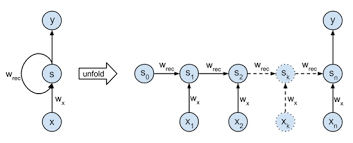

In [ ]:
SimRNN=Sequential()
SimRNN.add(SimpleRNN(20,return_sequences=True,input_shape=(3,49)))
SimRNN.add(SimpleRNN(20,return_sequences=True))
SimRNN.add(SimpleRNN(1))



In [ ]:
SimRNN.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
SimRNN.summary()

In [ ]:
SimRNN.fit(x_train_transformed,y_train_transformed, epochs=100, batch_size=32, validation_split = 0.2)

In [ ]:
Y_srnn=SimRNN.predict(x_test_transformed)

In [ ]:
Y_srnn.shape

In [ ]:
Y_srnn

In [ ]:
weather_data_test_srnn=weather_data_test.tail(4947)

In [ ]:
weather_data_test_srnn['pred_srnn']=Y_srnn

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=2, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_test_srnn.reset_index()['time_idx'], y=weather_data_test_srnn.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test_srnn.reset_index()['time_idx'], y=weather_data_test_srnn.reset_index()['pred_srnn'],name='Predicted generated solar power RNN '),row=2,col=1
)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

In [ ]:
rmse_srnn = sqrt(mean_squared_error(weather_data_test_srnn['power_normed'],weather_data_test_srnn['pred_srnn']))

In [ ]:
print('RMSE WITH srnn',rmse_srnn)

### Building first LSTM Model for forecasting

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (3,49)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=regressor.fit(x_train_transformed, y_train_transformed, epochs = 100, batch_size = 32)


In [ ]:
regressor.summary()

In [ ]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Prediction

In [ ]:
yp=regressor.predict(x_test_transformed)

In [ ]:
weather_data_test_lstm=weather_data_test.tail(4947)

In [ ]:
weather_data_test_lstm['Predicted_lstm']=yp

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_test_lstm.reset_index()['time_idx'], y=weather_data_test_lstm.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test_lstm.reset_index()['time_idx'], y=weather_data_test_lstm.reset_index()['Predicted_lstm'],name='Predicted generated solar power LSTM '),row=1,col=1
)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

In [ ]:
rmse_LSTM= sqrt(mean_squared_error(weather_data_test_lstm['power_normed'],weather_data_test_lstm['Predicted_lstm']))

In [ ]:
print('RMSE WITH MLP',rmse_MLP)
print('RMSE WITH MLP+PCA',rmse_PCA_MLP)
print('RMSE WITH LSTM',rmse_LSTM)

### PCA+LSTM

In [ ]:
pca = PCA(n_components=20)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(weather_input_ts)

In [ ]:
num_steps = 3
# training set
(x_train_transformed,
 y_train_transformed) = lstm_data_transform(X_pca_train, y_train, num_steps=num_steps)
assert x_train_transformed.shape[0] == y_train_transformed.shape[0]
# test set
(x_test_transformed,
 y_test_transformed) = lstm_data_transform(X_pca_test, solpow, num_steps=num_steps)

In [ ]:
x_train_transformed.shape

In [ ]:
regressor1 = Sequential()
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (3,20)))
regressor1.add(Dropout(0.2))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.25))

regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.25))

regressor1.add(Dense(units = 1))

regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor1.fit(x_train_transformed, y_train_transformed, epochs = 100, batch_size = 32)

In [ ]:
Y=regressor1.predict(x_test_transformed)

In [ ]:
weather_data_test_lstm['Predicted_lstm_pca']=Y

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Scatter(x=weather_data_test_lstm.reset_index()['time_idx'], y=weather_data_test_lstm.reset_index()['power_normed'],name='Actual generated solar power'),row=1,col=1
)
fig.add_trace(
    go.Scatter(x=weather_data_test_lstm.reset_index()['time_idx'], y=weather_data_test_lstm.reset_index()['Predicted_lstm_pca'],name='Predicted generated solar power PCA+LSTM '),row=1,col=1
)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="SolarPower")

fig.show()

In [ ]:
rmse_pca_LSTM= sqrt(mean_squared_error(Y,y_test_transformed))

In [ ]:
print('RMSE WITH MLP',rmse_MLP)
print('RMSE WITH MLP+PCA',rmse_PCA_MLP)
print('RMSE WITH srnn',rmse_srnn)
print('RMSE WITH LSTM',rmse_LSTM)
print('RMSE WITH LSTM+PCA',rmse_pca_LSTM)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np

In [ ]:
mse_MLP = (mean_squared_error(weather_data_test['power_normed'],weather_data_test['Predicted_power_normed']))
mse_PCA_MLP= (mean_squared_error(weather_data_test['power_normed'],weather_data_test['Predicted_power_normed_pca']))
#mse_srnn = (mean_squared_error(weather_data_test_srnn['power_normed'],weather_data_test_srnn['pred_srnn']))
mse_LSTM= (mean_squared_error(weather_data_test_lstm['power_normed'],weather_data_test_lstm['Predicted_lstm']))
mse_pca_LSTM= (mean_squared_error(Y,y_test_transformed))


In [ ]:
print('MSE WITH MLP',mse_MLP)
print('MSE WITH MLP+PCA',mse_PCA_MLP)
#print('RMSE WITH srnn',rmse_srnn)
print('MSE WITH LSTM',mse_LSTM)
print('MSE WITH LSTM+PCA',mse_pca_LSTM)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mae_MLP = (mean_absolute_error(weather_data_test['power_normed'],weather_data_test['Predicted_power_normed']))
mae_PCA_MLP= (mean_absolute_error(weather_data_test['power_normed'],weather_data_test['Predicted_power_normed_pca']))
#mse_srnn = (mean_squared_error(weather_data_test_srnn['power_normed'],weather_data_test_srnn['pred_srnn']))
mae_LSTM= (mean_absolute_error(weather_data_test_lstm['power_normed'],weather_data_test_lstm['Predicted_lstm']))
mae_pca_LSTM= (mean_absolute_error(Y,y_test_transformed))

In [ ]:
print('MAE WITH MLP',mae_MLP)
print('MAE WITH MLP+PCA',mae_PCA_MLP)
#print('RMSE WITH srnn',rmse_srnn)
print('MAE WITH LSTM',mae_LSTM)
print('MAE WITH LSTM+PCA',mae_pca_LSTM)

### AutoEncoder based feature Extraction with LSTM

Autoencoder is a type of neural network that can be used to learn a compressed representation of raw data.

An autoencoder is composed of an encoder and a decoder sub-models. The encoder compresses the input and the decoder attempts to recreate the input from the compressed version provided by the encoder. After training, the encoder model is saved and the decoder is discarded.

## The encoder can then be used as a data preparation technique to perform feature extraction on raw data that can be used to train a different machine learning model.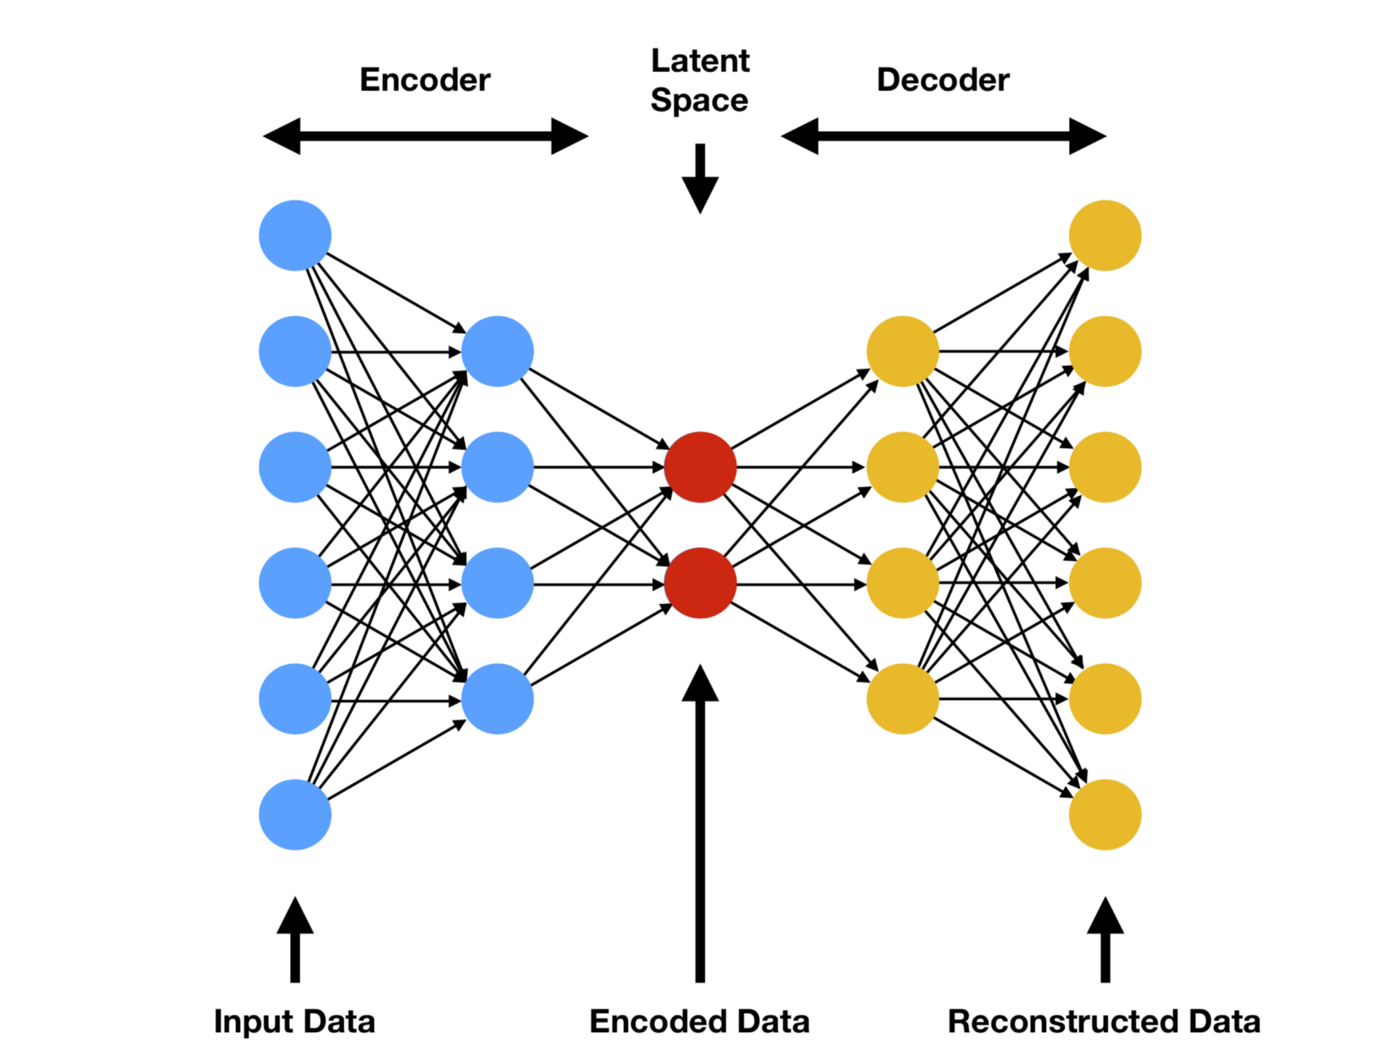

In [ ]:
df=pd.read_excel("/content/pv_02.xlsx")

In [ ]:
weather_input1=df.drop('power_normed',axis=1)
weather_input2=weather_input1.drop('time_idx',axis=1)
solpow=df['power_normed']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(weather_input2,solpow, test_size=0.33, random_state=42,shuffle=False)

In [ ]:
n_inputs = X_train.shape[1]

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import load_model

In [ ]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/50
263/263 - 6s - loss: 0.0863 - val_loss: 0.0256 - 6s/epoch - 21ms/step
Epoch 2/50
263/263 - 2s - loss: 0.0221 - val_loss: 0.0136 - 2s/epoch - 7ms/step
Epoch 3/50
263/263 - 2s - loss: 0.0188 - val_loss: 0.0103 - 2s/epoch - 7ms/step
Epoch 4/50
263/263 - 2s - loss: 0.0168 - val_loss: 0.0088 - 2s/epoch - 8ms/step
Epoch 5/50
263/263 - 2s - loss: 0.0152 - val_loss: 0.0073 - 2s/epoch - 8ms/step
Epoch 6/50
263/263 - 2s - loss: 0.0144 - val_loss: 0.0070 - 2s/epoch - 8ms/step
Epoch 7/50
263/263 - 2s - loss: 0.0136 - val_loss: 0.0073 - 2s/epoch - 8ms/step
Epoch 8/50
263/263 - 2s - loss: 0.0134 - val_loss: 0.0062 - 2s/epoch - 8ms/step
Epoch 9/50
263/263 - 2s - loss: 0.0125 - val_loss: 0.0058 - 2s/epoch - 7ms/step
Epoch 10/50
263/263 - 2s - loss: 0.0120 - val_loss: 0.0073 - 2s/epoch - 6ms/step
Epoch 11/50
263/263 - 2s - loss: 0.0113 - val_loss: 0.0049 - 2s/epoch - 7ms/step
Epoch 12/50
263/263 - 1s - loss: 0.0114 - val_loss: 0.0051 - 988ms/epoch - 4ms/step
Epoch 13/50
263/263 - 1s - loss: 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
#n_bottleneck = round(float(n_inputs) / 2.0)
n_bottleneck = 20
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [ ]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,X_test))

In [ ]:
! pip uninstall tensorflow
! pip install tensorflow==2.3.0

In [ ]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()
NN_model.add(Dense(8, kernel_initializer='normal',input_dim =X_train_encode.shape[1], activation='relu'))


NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))

NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))


NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
history=NN_model.fit(X_train_encode,y_train, epochs=100, batch_size=32, validation_split = 0.2)

65/65 [==============================] - 0s 3ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 8)                 168       
                                                                 
 dense_17 (Dense)            (None, 32)                288       
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dense_19 (Dense)            (None, 16)                1040      
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,625
Trainable params: 3,625
Non-trainable params: 0
_________________________________________________________________

In [ ]:
X_train_encode.shape

(4206, 20)

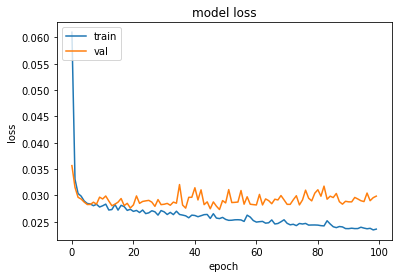

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.plot(history.history['mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
res=NN_model.predict(X_test_encode)

65/65 [==============================] - 0s 3ms/step


In [ ]:
res.shape

(2072, 1)

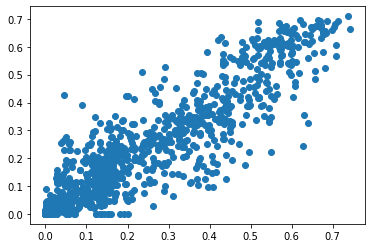

In [ ]:
plt.scatter(res,y_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse_AUTOMLP= sqrt(mean_squared_error(res,y_test))

In [ ]:
print(rmse_AUTOMLP)

0.06090911911140022
